In [1]:
# Naložimo knjižnjice in funkcije
from sage.all import graphs
from funkcije import Ln_graph, build_star, build_star2, subpath_number, cubic_graphs, encode_time_hms
from metahevristika import simulated_annealing_subpath
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

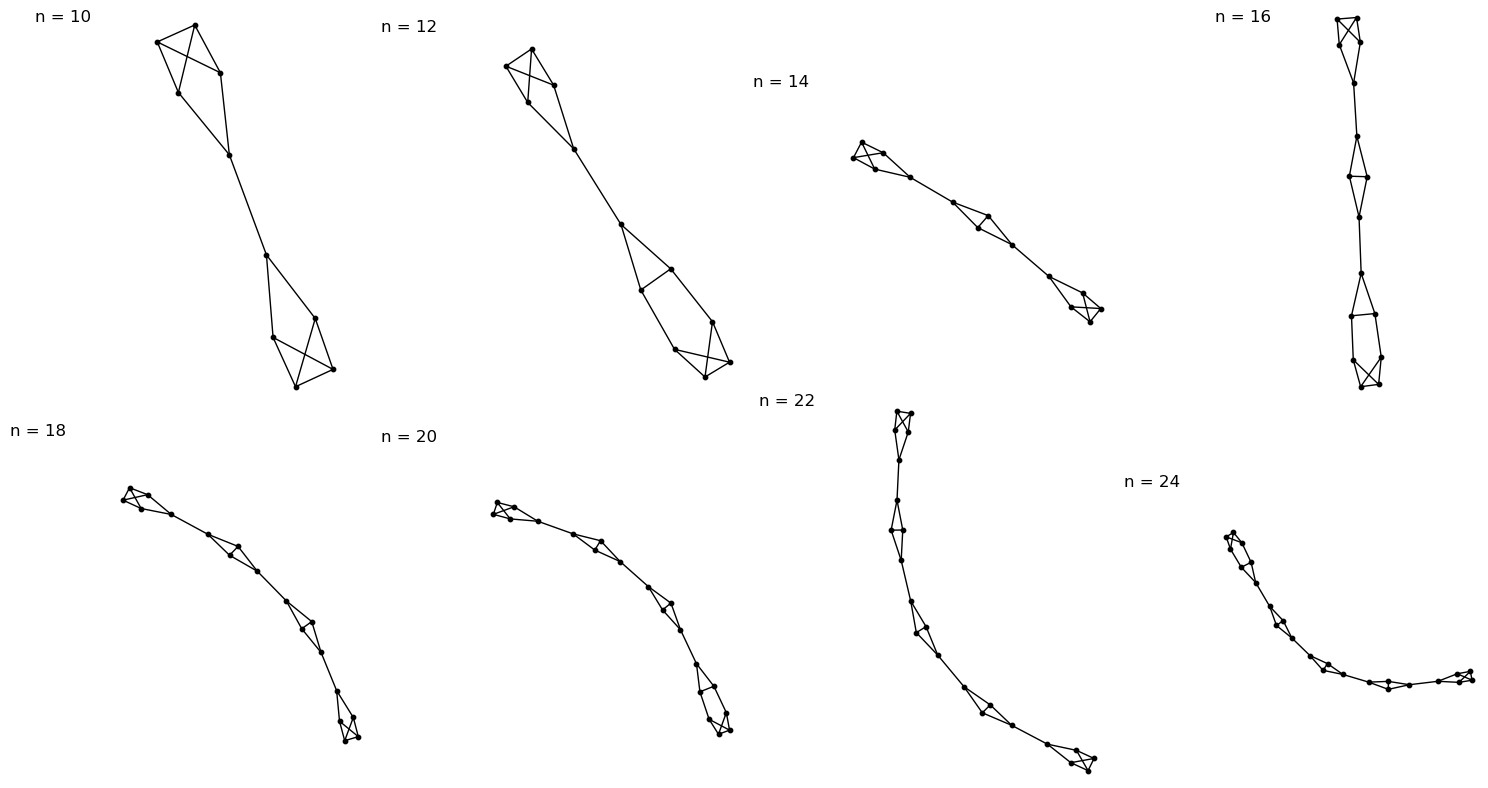

In [5]:
# Preizkusimo funkcijo Ln_graphs

Ln_plots = []
for n in range(10, 27, 2):
    # narisan graf
    Gplot = Ln_graph(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    Ln_plots.append(Gplot + title)

row1 = Ln_plots[:4]
row2 = Ln_plots[4:8]

GA = graphics_array([row1, row2])
GA.show(figsize=(15, 8), axes=False)

In [ ]:
# Preverimo koliko je vseh kubičnih grafov za vsak n
# NE POGANJAJ ZNOVA: Trajalo je 110min
for n in range(4,23,2):
    c = sum(1 for _ in cubic_graphs(n))
    print(f"n={n} število grafov: {c}")

n=4 število grafov: 1
n=6 število grafov: 2
n=8 število grafov: 5
n=10 število grafov: 19
n=12 število grafov: 85
n=14 število grafov: 509
n=16 število grafov: 4060
n=18 število grafov: 41301
n=20 število grafov: 510489
n=22 število grafov: 7319447


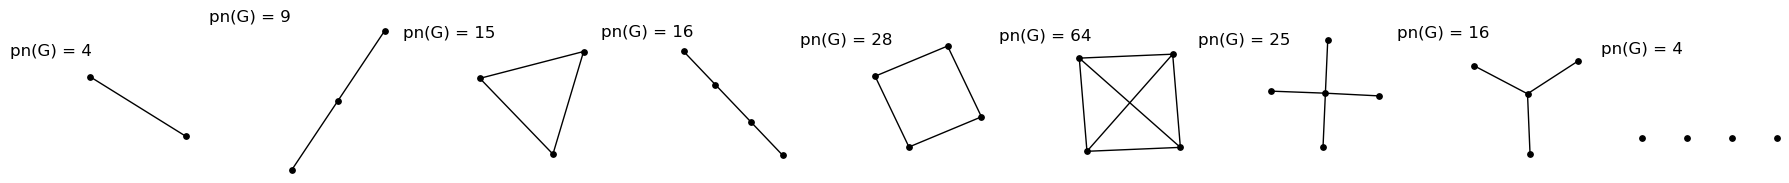

In [ ]:
# preverjamo delovanje funkcije subpath_number na enostavnih grafih
graphs_list = [
    # 2. P2: pot s 2 vozlišči
    Graph({0:[1]}),
    # 3. Zvezda S3: center 0, listi 1 in 2
    Graph({0:[1,2]}),
    # 3. C3: trikotnik
    Graph({0:[1,2], 1:[2]}),
    # 4. Potni graf P4
    Graph({0:[1], 1:[2], 2:[3]}),
    # 4. Cikel C4
    Graph({0:[1,3], 1:[2], 2:[3]}),
    # 4. Popoln graf K4
    graphs.CompleteGraph(4),
    # 4. Zvezda S4
    graphs.StarGraph(4),
    # 4. Drevo v obliki črke T
    Graph({0:[1,2,3]}),
    # 4. Diskretni graf na 4 vozliščih
    Graph(4)
]

plots = []
for G in graphs_list:
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=15,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {subpath_number(G)}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    plots.append(Gplot + title)

# prikaz v eni vrstici
graphics_array([plots]).show(figsize=(18,3), axes=False)

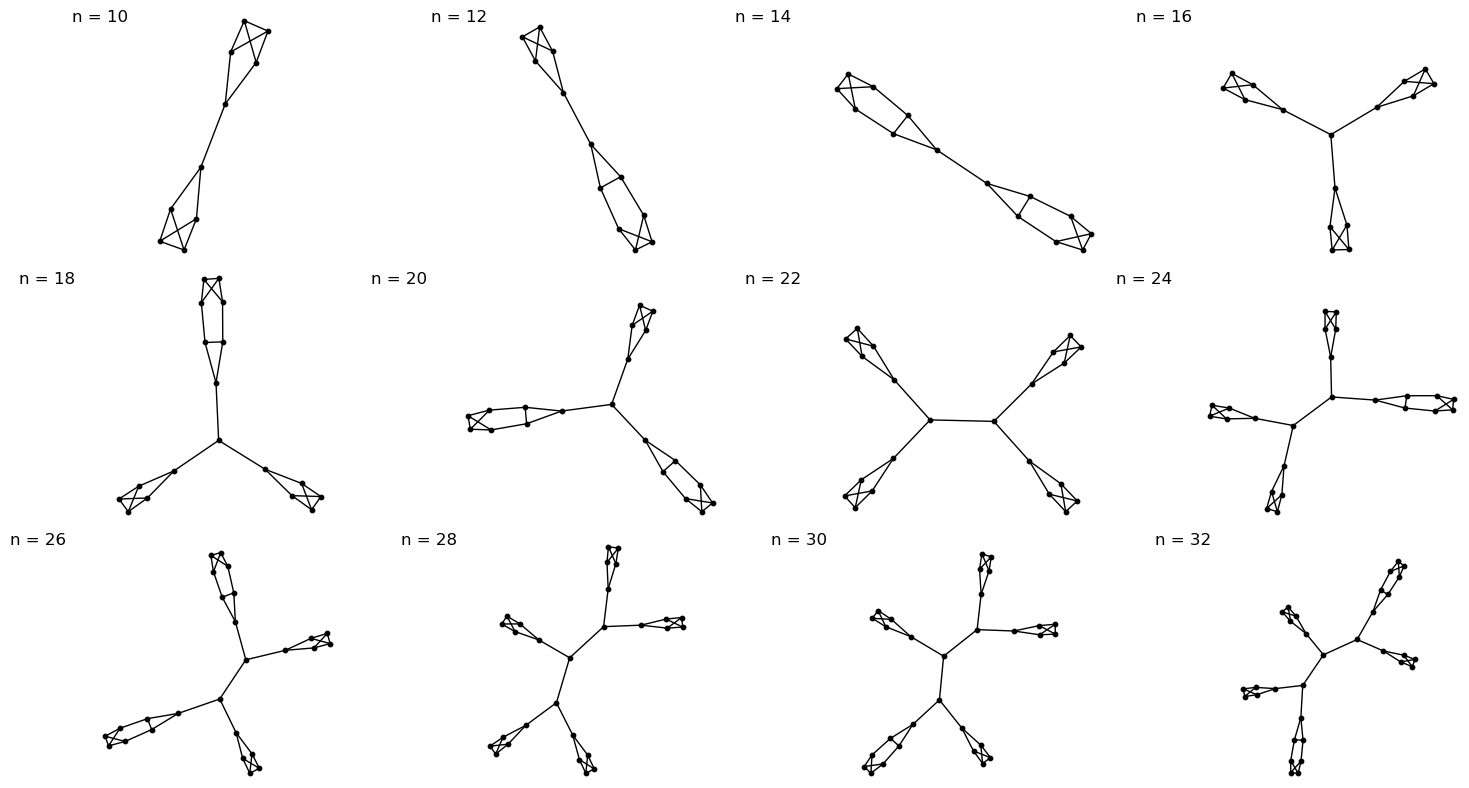

In [ ]:
# Preizkusimo funkcijo build_star

star_plots = []
for n in range(10, 33, 2):
    # narisan graf
    Gplot = build_star(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=400
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    star_plots.append(Gplot + title)

row1 = star_plots[:4]
row2 = star_plots[4:8]
row3 = star_plots[8:12]

GA = graphics_array([row1, row2, row3])
GA.show(figsize=(15, 8), axes=False)

## Prva točka

Tu je cilj preveriti pravilnost trditve za čim večje n, kjer Ln **primerjamo z vsemi možnimi kubičnimi grafi** na n vozliščih

Shranili bomo:

        - CSV boljših grafov od Ln

Za csv n = 16 je trajalo 1,5 min (41301 grafov), za n = 18: 80 min (41301 grafov) -> **za n = 20 je 510489 grafov**

In [ ]:
start_time = time.time()

os.makedirs("Data", exist_ok=True)

for n in range(10, 19, 2):
    file_n = os.path.join("Data", f"boljsi_Ln_n{n}.csv")

    # VAROVALO: če datoteka že obstaja, je ne povozi in preskoči n
    if os.path.exists(file_n):
        print(f"Preskok n = {n} | datoteka že obstaja: {file_n}")
        continue
        
    start = time.time()

    # Ustvari/odpri CSV za trenutni n
    with open(file_n, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["n", "graph6", "pn(G)", "pn(Ln)", "pn(star)"])

        Ln = Ln_graph(n)
        pn = subpath_number(Ln)
        star = build_star(n)
        pn2 = subpath_number(star)


        written = 0 

        for G in cubic_graphs(n):
            pnG = subpath_number(G)
            if pnG < pn:
                writer.writerow([n, G.graph6_string(), pnG, pn, pn2])
                written += 1

    elapsed_total = time.time() - start_time
    end = time.time() - start

    print(f"Zaključil n = {n} | datoteka: {file_n} | zapisov: {written+1} | čas n: {encode_time_hms(end)} | skupni: {encode_time_hms(elapsed_total)}")


Preskok n = 10 | datoteka že obstaja: Data/boljsi_Ln_n10.csv
Preskok n = 12 | datoteka že obstaja: Data/boljsi_Ln_n12.csv
Preskok n = 14 | datoteka že obstaja: Data/boljsi_Ln_n14.csv
Preskok n = 16 | datoteka že obstaja: Data/boljsi_Ln_n16.csv
Preskok n = 18 | datoteka že obstaja: Data/boljsi_Ln_n18.csv


In [8]:
folder = "Data"
dfs = []

for file in os.listdir(folder):
    if file.lower().endswith(".csv"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["source_file"] = file  # dodamo informacijo, iz katere datoteke prihaja
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

In [9]:
df_f = df[df["n"] == 18].copy()
df_f = df_f.sort_values("pn(G)")
df_min3 = df_f.head(int(3))
slov = dict(zip(df_min3["graph6"], df_min3["pn(G)"]))

for G6, pn in slov.items():
    G = Graph(G6)
    print(pn)

7072
7296
7380


In [22]:
for n in range(10, 11, 2):
    Ln = Ln_graph(n)  # ali build_star2(n)

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        Ln,
        steps=2000,
        T0=1.0,
        alpha=0.999,
        max_tries = 800,
        verbose=False
    )
    elapsed = time.time() - start
    print(f"Zaključil n = {n} v času {encode_time_hms(elapsed)} | Best_E = {best_E}")
    if best_E <= subpath_number(Ln):
        print("Graf je boljši")

    plt.figure(figsize=(10, 4))
    plt.plot(history)
    plt.xlabel("Korak")
    plt.ylabel("Energija (subpath_number)")
    plt.title(f"n = {n} | Potek energije med simulated annealing")
    plt.grid(True)
    plt.show()


TypeError: simulated_annealing_subpath() got an unexpected keyword argument 'max_tries'

Zaključil n = 20 v času 00:00:10.764 | Best_E = 11708
Zaključil n = 20 v času 00:00:11.389 | Best_E = 12816
Zaključil n = 20 v času 00:00:11.097 | Best_E = 12816


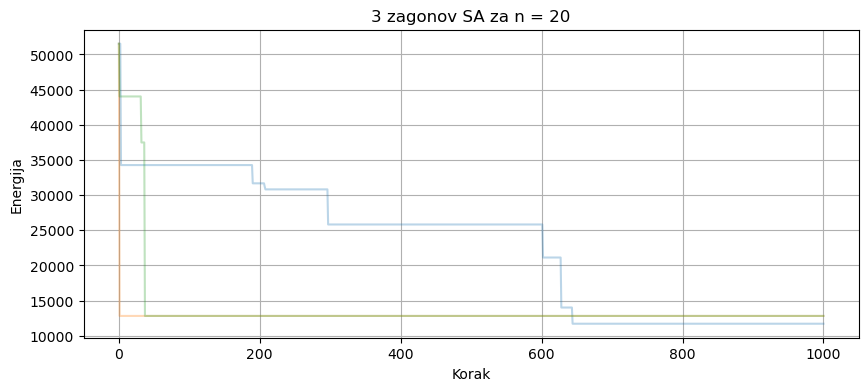

In [6]:
k = 3
n = 20
all_histories = []
for _ in range(k):
    Ln = Ln_graph(n)  # ali build_star2(n)

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        Ln,
        steps=1000,
        T0=1.0,
        alpha=0.999,
        max_tries = 800,
        verbose=False
    )
    elapsed = time.time() - start
    print(f"Zaključil n = {n} v času {encode_time_hms(elapsed)} | Best_E = {best_E}")
    all_histories.append(history)
    
plt.figure(figsize=(10, 4))
for hist in all_histories:
    plt.plot(hist, alpha=0.3)  # malo prosojno
plt.xlabel("Korak")
plt.ylabel("Energija")
plt.title(f"{k} zagonov SA za n = {n}")
plt.grid(True)
plt.show()

In [5]:
for n in range(10, 41, 2):
    G2 = build_star(n)
    G3 = build_star2(n)
    pn2 = subpath_number(G2)
    pn3 = subpath_number(G3)
    print(f"n = {n} | star1: {pn2} | star2: {pn3} | {pn3 <= pn2}")
    

n = 10 | star1: 1276 | star2: 1276 | True
n = 12 | star1: 3076 | star2: 3076 | True
n = 14 | star1: 7188 | star2: 5504 | True
n = 16 | star1: 3640 | star2: 3640 | True
n = 18 | star1: 7072 | star2: 7072 | True
n = 20 | star1: 12816 | star2: 11708 | True
n = 22 | star1: 7156 | star2: 7156 | True
n = 24 | star1: 12220 | star2: 12220 | True
n = 26 | star1: 19596 | star2: 19064 | True
n = 28 | star1: 11824 | star2: 11824 | True
n = 30 | star1: 18520 | star2: 18520 | True
n = 32 | star1: 27528 | star2: 27572 | False
n = 34 | star1: 17644 | star2: 17644 | True
n = 36 | star1: 25972 | star2: 25972 | True
n = 38 | star1: 36612 | star2: 37232 | False
n = 40 | star1: 24616 | star2: 24616 | True
